<a href="https://colab.research.google.com/github/fula122/projects/blob/main/Deforestation_vs_Pop_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing the Relationship Between Deforestation and Population Density in California

California is one of the top eight regions in the United States that were responsible for 53% of all tree cover loss between 2001 and 2023. During this time, California has seen a total population growth of roughly 4.97 million. This study focuses on finding a potential correlation between deforestation and population growth throughout the state, and what the land is used for once deforested.

### Research Question

Is there a specific correlation between the areas in California in which deforestation is occurring and areas of population growth? More specifically, is the state of California actively cutting down trees to provide more land for it's population to live?

### How will this study attempt to answer this question?

In order to accomplish this study, I will be making two important maps. One which will show the overlap of deforestation from the years 2005, 2010, 2015, and 2020, and population density in the state of California, and another that will show the overlap of said deforestation and current land cover/use in California.

I will then create an analysis to see how many square kilomoters of land that were deforested now have a population density of over 12,824 people per square mile, or over the 33rd percentile for population density in the state. This will test whether there is a correlation between deforestation and highly populated areas.

The final part of the analysis will be calculating what land coverage/land use types were most commonly left after deforestation occurred. In other words, what is the deforested land being used for now? This analysis will be accompanied by each land coverage type in the NLCD Land Cover map along with the associated square kilometers of deforestation that occurred within each.

### Data to be used

For this project, I will be utilizing the following data sets:

Hansen Global Forest Change v1.11 (2000-2023)
  -available on Google Earth Engine

Gridded Population of the World v4.11 (Population Density) (2000-2020)
  -avalibale on Google Earth Engine

NLCD 2019: USGS National Land Cover Database
  -available on Google Earth Engine

Boundary of California from TIGER/Line Data 2018
  -available on Google Earth Engine

### Setting up project workspace

For this project, there are essential libraries I will need to install to ensure I can do all that is needed concerning the scope.

In [ ]:
%pip install geemap earthengine-api matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00


In [ ]:
import mapclassify
import geemap
import ee
import matplotlib.pyplot as plt

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize(project="ee-andersonfuller40")

### Importing Data from Google Earth Engine

With all of these libraries now imported into the workspace and geemap initialized, I can now download all necessary databases from geemap along with information about specific bands and coordinate systems for each.

Adding Hansen Global Forest Change

In [ ]:
dataset = ee.Image('UMD/hansen/global_forest_change_2023_v1_11')

projection = dataset.projection()
print("Projection:", projection.getInfo())

band_info = dataset.bandTypes().getInfo()
print("\nBand Information:")
for band_name, band_type in band_info.items():
    print(f"  Band: {band_name}, Type: {band_type}")

Projection: {'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [0.00025, 0, -180, 0, -0.00025, 80]}

Band Information:
  Band: datamask, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: first_b30, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: first_b40, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: first_b50, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: first_b70, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: gain, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: last_b30, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: last_b40, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: last_b50, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}
  Band: last_b70, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 2

Adding GPWv411 Population Density Data

In [ ]:
dataset2 = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Density")

image = dataset2.first()
projection = image.projection()
print("Projection:", projection.getInfo())

band_info = image.bandTypes().getInfo()
print("\nBand Information:")
for band_name, band_type in band_info.items():
    print(f"  Band: {band_name}, Type: {band_type}")

Projection: {'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [0.00833333333333333, 0, -180, 0, -0.00833333333333333, 89.99999999999991]}

Band Information:
  Band: population_density, Type: {'type': 'PixelType', 'precision': 'float'}


Adding NLCD Land Cover Data

In [ ]:
dataset3 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = dataset3.select('landcover')


projection = dataset3.projection()
print("Projection:", projection.getInfo())


band_info = landcover.bandTypes().getInfo()
print("\nBand Information (landcover band):")
for band_name, band_type in band_info.items():
    print(f"  Band: {band_name}, Type: {band_type}")

Projection: {'type': 'Projection', 'wkt': 'PROJCS["IMAGINE GeoTIFF Support\nERDAS IMAGINE 2018  16.5.0.596\nProjection = Albers Conical Equal Area", \n  GEOGCS["WGS 84", \n    DATUM["WGS_1984", \n      SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], \n      AUTHORITY["EPSG","6326"]], \n    PRIMEM["Greenwich", 0.0], \n    UNIT["degree", 0.017453292519943295], \n    AXIS["Longitude", EAST], \n    AXIS["Latitude", NORTH], \n    AUTHORITY["EPSG","4326"]], \n  PROJECTION["Albers_Conic_Equal_Area"], \n  PARAMETER["central_meridian", -96.0], \n  PARAMETER["latitude_of_origin", 23.0], \n  PARAMETER["standard_parallel_1", 29.5], \n  PARAMETER["false_easting", 0.0], \n  PARAMETER["false_northing", 0.0], \n  PARAMETER["standard_parallel_2", 45.5], \n  UNIT["m", 1.0], \n  AXIS["x", EAST], \n  AXIS["y", NORTH]]', 'transform': [30, 0, -2493045, 0, -30, 3310005]}

Band Information (landcover band):
  Band: landcover, Type: {'type': 'PixelType', 'precision': 'int', 'min': 0, 'm

In [ ]:
us_states = ee.FeatureCollection("TIGER/2018/States")

first_feature = us_states.first()
projection = first_feature.geometry().projection()
print("Projection:", projection.getInfo())

properties = first_feature.propertyNames().getInfo()
print("\nField Data (Properties):", properties)

schema = us_states.limit(1).getInfo().get('features')[0].get('properties')
print("\nSchema (Data Types):", schema)

Projection: {'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [1, 0, 0, 0, 1, 0]}

Field Data (Properties): ['STATENS', 'GEOID', 'AWATER', 'LSAD', 'STUSPS', 'STATEFP', 'FUNCSTAT', 'INTPTLAT', 'DIVISION', 'REGION', 'NAME', 'INTPTLON', 'MTFCC', 'ALAND', 'system:index']

Schema (Data Types): {'ALAND': 348021896, 'AWATER': 1550236201, 'DIVISION': '0', 'FUNCSTAT': 'A', 'GEOID': '78', 'INTPTLAT': '+18.3267480', 'INTPTLON': '-064.9712508', 'LSAD': '00', 'MTFCC': 'G4000', 'NAME': 'United States Virgin Islands', 'REGION': '9', 'STATEFP': '78', 'STATENS': '01802710', 'STUSPS': 'VI'}


### Creating bounds for to the state of California

Although this data is useful, I do not need data for any area outside of my main focus area. I will now download the boundary of the state of California from Google Earth Engine and use this clipped area for further analysis.

In [ ]:
california = us_states.filter(ee.Filter.eq('NAME', 'California'))

### Creating Map for Forest Loss in California from 2005-2020

This map shows the deforestation of the state of California from the years 2005-2020 in five year intervals. I felt that it was important to visualize all of the datasets separately before combining them.

In [ ]:
deforest_map = geemap.Map()

def create_deforestation_layer(year, color):
    deforestation_filtered = dataset.select('lossyear').updateMask(
        dataset.select('lossyear').eq(year - 2000)
    ).clip(california)

    deforestation_vis_params = {
        'palette': [color],
        'opacity': 1.0
    }
    deforestation_vis = deforestation_filtered.visualize(**deforestation_vis_params)

    return deforestation_vis

deforestation_2005_vis = create_deforestation_layer(2005, 'red')
deforestation_2010_vis = create_deforestation_layer(2010, 'orange')
deforestation_2015_vis = create_deforestation_layer(2015, 'yellow')
deforestation_2020_vis = create_deforestation_layer(2020, 'green')
deforest_map.centerObject(california, zoom=6)
deforest_map.addLayer(deforestation_2005_vis, {}, 'Deforestation 2005')
deforest_map.addLayer(deforestation_2010_vis, {}, 'Deforestation 2010')
deforest_map.addLayer(deforestation_2015_vis, {}, 'Deforestation 2015')
deforest_map.addLayer(deforestation_2020_vis, {}, 'Deforestation 2020')

legend_keys = ['2005', '2010', '2015', '2020']
colors = [
    (255, 0, 0),
    (255, 165, 0),
    (255, 255, 0),
    (0, 128, 0)
]

deforest_map.add_legend(title="Deforestation Year", keys=legend_keys, colors=colors)

deforest_map

Map(center=[37.152434104671315, -119.52655155150876], controls=(WidgetControl(options=['position', 'transparen…

### Creating Population Density Map

This population layer is the culmination of census data from 2000-2020 which shows the overall layout of population density across the state of California. Note that I needed to get the min and max population density for the state of Califronia specifically to obtain values for future analysis. Google Earth Engine makes maps with regards to percentiles, so to ensure that the legend was correct, I needed to provide min and max values.

In [ ]:
pop_density = dataset2.mosaic().clip(california).select('population_density')

pop_map = geemap.Map()

pop_stats = pop_density.reduceRegion(
    reducer=ee.Reducer.minMax().combine(ee.Reducer.mean(), sharedInputs=True),
    geometry=california.geometry(),
    scale=927.67,
    maxPixels=1e8
)

min_value = pop_stats.get('population_density_min')
max_value = pop_stats.get('population_density_max')
print('Min:', min_value.getInfo())
print('Max:', max_value.getInfo())

pop_vis_params = {
    'min': min_value,
    'max': max_value,
    'palette': ['#D3D3D3', 'blue', 'purple']
}

pop_vis = pop_density.visualize(**pop_vis_params)

pop_map.addLayer(pop_vis, {}, 'Population Density')

legend_keys = ["0-12,823.57", "12,823.57-25,647.12", "25,647.13-38,470.68"]

colors = [
    (211, 211, 211),
    (0, 0, 255),
    (128, 0, 128)
]

pop_map.add_legend(title="Population Density (People Per Square km)", keys=legend_keys, colors=colors)

pop_map.centerObject(california, zoom=6)

pop_map

Min: 0
Max: 38470.6796875


Map(center=[37.152434104671315, -119.52655155150876], controls=(WidgetControl(options=['position', 'transparen…

### Creating Land Cover Map

This map shows the NLCD Land Cover of the State of California.

In [ ]:
landuse_map = geemap.Map()
landcover_ca = landcover.clip(california)
landuse_map.addLayer(landcover_ca, {}, 'NLCD Land Cover (California)')
landuse_map.add_legend(builtin_legend='NLCD', title="NLCD Land Cover")
landuse_map.centerObject(california, zoom=6)
landuse_map

Map(center=[37.152434104671315, -119.52655155150876], controls=(WidgetControl(options=['position', 'transparen…

### Combining Population Density and Deforestation Layers for analysis

This is the first of two imporant maps that will be visual aids for the analysis of this project. This will show the overlap of deforestation from 2005-2020 and the population density of California in 2020.

In [ ]:
merge_map = geemap.Map()

merge_map.addLayer(pop_vis, {}, 'Population Density')

deforestation_vis = create_deforestation_layer(2005, 'red')
deforestation_vis2 = create_deforestation_layer(2010, 'red')
deforestation_vis3 = create_deforestation_layer(2015, 'red')
deforestation_vis4 = create_deforestation_layer(2020, 'red')

merge_map.addLayer(deforestation_vis, {}, 'Deforestation 2005')
merge_map.addLayer(deforestation_vis2, {}, 'Deforestation 2010')
merge_map.addLayer(deforestation_vis3, {}, 'Deforestation 2015')
merge_map.addLayer(deforestation_vis4, {}, 'Deforestation 2020')
merge_map.centerObject(california, zoom=6)

legend_keys_merge = ["0-12,823.57", "12,823.57-25,647.12", "25,647.13-38,470.68", "Deforestation"]

colors_merge = [
    (211, 211, 211),
    (0, 0, 255),
    (128, 0, 128),
    (255, 0, 0)
]

merge_map.add_legend(title="Population Density (People Per Square km) and Deforestation", keys=legend_keys_merge, colors=colors_merge)

merge_map

Map(center=[37.152434104671315, -119.52655155150876], controls=(WidgetControl(options=['position', 'transparen…

### What is the correlation between deforestation and the creation of high population density centers?

This is the first bit of analysis for this project. In order to perform this analysis, it was necessary to create a threshold for what I would want to consider high population density areas. I chose 12,824 people per square kilometer as it is in the 33rd percentile of population density in California.

In this code, I had to create the population threshold and select the deforestation years for analysis. I then masked the deforestation data to only show the selected years and clipped that data to the boundary of California. I then performed basic raster analysis calculations along with the reduceRegion function to sum up all of the cells in which the two layers overlapped. Because I was working with the 'lossyear' band, I needed to access this band at the end to access the summed area value.

In [ ]:
population_threshold = 12824

high_density_areas = pop_density.gt(population_threshold)

deforestation_years = [2005, 2010, 2015, 2020]

deforestation_mask = ee.Image(0)
for year in deforestation_years:
    deforestation_mask = deforestation_mask.Or(
        dataset.select('lossyear').eq(year - 2000)
    )

deforestation_filtered = dataset.select('lossyear').updateMask(deforestation_mask).clip(california)

intersection = deforestation_filtered.And(high_density_areas)

area_image = intersection.multiply(ee.Image.pixelArea().divide(1e6))
total_area = area_image.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=california.geometry(),
    scale=30,
    maxPixels=1e13
).get('lossyear')

print('Total area of intersection (sq km):', total_area.getInfo())

Total area of intersection (sq km): 0.0028405933837890624


### Results for correlation between deforested areas and high population centers

Through this analysis, the total area of deforestation over a 15 year period that overlaps with land with a population density of 12,824 people per square kilometer is 0.0028 square kilometers. This of course is very small and insignificant. This points to the result of no correlation between deforestation and high population centers in California.

### Combining Population Density and Land Cover for analysis

I will now create the second important map for further analysis. This map shows the overlap between deforestation from 2005-2020 and land use as of 2019.

In [ ]:
def create_deforestation_layers(year):
    deforestation_filtered = dataset.select('lossyear').updateMask(
        dataset.select('lossyear').eq(year - 2000)
    ).clip(california)
    return deforestation_filtered

years = [2005, 2010, 2015, 2020]

merge_map2 = geemap.Map()

merge_map2.addLayer(landcover.clip(california), {}, 'NLCD Land Cover')

colors = ['black', 'black', 'black', 'black']

for i, year in enumerate(years):
  deforestation_layer = create_deforestation_layers(year)
  merge_map2.addLayer(deforestation_layer, {'palette': [colors[i]], 'opacity': 0.7}, f'Deforestation {year}')

merge_map2.centerObject(california, zoom=6)

merge_map2.add_legend(title="NLCD Land Cover", builtin_legend='NLCD')

legend_keys2 = ['Deforestation']
legend_colors2 = [(0, 0, 0)]

merge_map2.add_legend(title="Deforestation", keys=legend_keys2, colors=legend_colors2, location = "bottomleft")

merge_map2

Map(center=[37.152434104671315, -119.52655155150876], controls=(WidgetControl(options=['position', 'transparen…

### What type of land cover is most prominent for deforestation?

Now that the map is created for visual aid purposes, we can now perform our analysis. Below is the function created to analyze land overlap between specific land coverage types in California and the previously used deforestation data to be called later during analysis.

In [ ]:
def calculate_overlap(year):
  deforestation = create_deforestation_layers(year)
  landcover_samples = landcover.sample(
      region=california,
      scale=30,
      numPixels=10000
  )

  landcover_classes = landcover_samples.aggregate_array('landcover').distinct().getInfo()

  overlap_areas = {}
  for lc_class in landcover_classes:
    lc_mask = landcover.eq(lc_class)
    intersection = deforestation.And(lc_mask)
    area = intersection.multiply(ee.Image.pixelArea()).reduceRegion(
      reducer=ee.Reducer.sum(),
      geometry=california,
      scale=30,
      maxPixels=1e13
    ).get('lossyear').getInfo()

    overlap_areas[lc_class] = area

  return overlap_areas

The next step in the analysis is to call the previous function to get the overlap of the two layers. The landcover_names dictionary is created to ensure that the landcover types correspond to thier correct description. The function is then called and calculates deforestation and land coverage overlaps by year in square kilometers.

In [ ]:
landcover_names = {
    11: "Open Water",
    12: "Perennial Ice/Snow",
    21: "Developed, Open Space",
    22: "Developed, Low Intensity",
    23: "Developed, Medium Intensity",
    24: "Developed, High Intensity",
    31: "Barren Land (Rock/Sand/Clay)",
    41: "Deciduous Forest",
    42: "Evergreen Forest",
    43: "Mixed Forest",
    51: "Dwarf Scrub",
    52: "Shrub/Scrub",
    71: "Grassland/Herbaceous",
    81: "Pasture/Hay",
    82: "Cultivated Crops",
    90: "Woody Wetlands",
    95: "Emergent Herbaceous Wetlands"
}

overlap_results = {}
for year in years:
  overlap_results[year] = calculate_overlap(year)

for year, overlap_data in overlap_results.items():
  print(f"Overlap for {year}:")
  for landcover_class, area in overlap_data.items():
    area_km2 = area / 1e6  # Convert to square kilometers
    landcover_name = landcover_names.get(landcover_class, "Unknown")
    print(f" {landcover_name}: {area_km2:.2f} km^2")

Overlap for 2005:
 Shrub/Scrub: 177.68 km^2
 Developed, Medium Intensity: 3.34 km^2
 Open Water: 0.82 km^2
 Grassland/Herbaceous: 40.41 km^2
 Evergreen Forest: 239.06 km^2
 Cultivated Crops: 47.27 km^2
 Developed, High Intensity: 0.83 km^2
 Developed, Low Intensity: 2.93 km^2
 Barren Land (Rock/Sand/Clay): 0.29 km^2
 Emergent Herbaceous Wetlands: 2.53 km^2
 Developed, Open Space: 13.53 km^2
 Pasture/Hay: 1.09 km^2
 Mixed Forest: 5.00 km^2
 Woody Wetlands: 1.29 km^2
 Deciduous Forest: 0.93 km^2
 Perennial Ice/Snow: 0.00 km^2
Overlap for 2010:
 Shrub/Scrub: 144.73 km^2
 Developed, Medium Intensity: 0.65 km^2
 Open Water: 0.75 km^2
 Grassland/Herbaceous: 32.00 km^2
 Evergreen Forest: 153.86 km^2
 Cultivated Crops: 45.18 km^2
 Developed, High Intensity: 0.26 km^2
 Developed, Low Intensity: 1.01 km^2
 Barren Land (Rock/Sand/Clay): 0.13 km^2
 Emergent Herbaceous Wetlands: 0.88 km^2
 Developed, Open Space: 7.82 km^2
 Pasture/Hay: 1.06 km^2
 Mixed Forest: 4.14 km^2
 Woody Wetlands: 0.58 km^2
 

The next step is the simple summation of all specific land coverage types accross all years.

In [ ]:
landcover_totals = {}

for year, overlap_data in overlap_results.items():
  for landcover_class, area in overlap_data.items():
    area_km2 = area / 1000000
    landcover_totals[landcover_class] = landcover_totals.get(landcover_class, 0) + area_km2

print("Total area for each land cover class:")
for landcover_class, total_area in landcover_totals.items():
  landcover_name = landcover_names.get(landcover_class, "Unknown")
  print(f"  {landcover_name}: {total_area:.2f} km^2")


Total area for each land cover class:
  Shrub/Scrub: 1803.64 km^2
  Developed, Medium Intensity: 5.48 km^2
  Open Water: 2.24 km^2
  Grassland/Herbaceous: 492.56 km^2
  Evergreen Forest: 3194.13 km^2
  Cultivated Crops: 251.33 km^2
  Developed, High Intensity: 1.47 km^2
  Developed, Low Intensity: 9.81 km^2
  Barren Land (Rock/Sand/Clay): 0.79 km^2
  Emergent Herbaceous Wetlands: 13.46 km^2
  Developed, Open Space: 131.07 km^2
  Pasture/Hay: 4.62 km^2
  Mixed Forest: 280.96 km^2
  Woody Wetlands: 9.15 km^2
  Deciduous Forest: 26.13 km^2
  Perennial Ice/Snow: 0.05 km^2


### Creation of Bar Graph

Finally, we can now make a bargraph representing total deforestation area by land cover class to visualize our analysis.

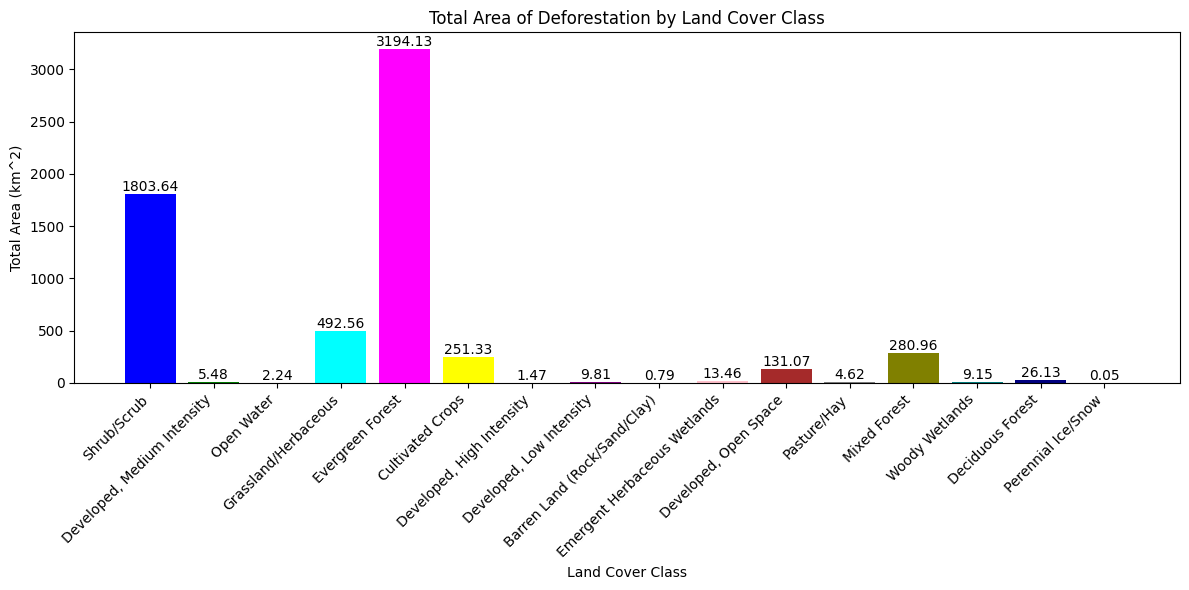

In [ ]:
landcover_classes = list(landcover_totals.keys())
total_areas = list(landcover_totals.values())
landcover_names_for_graph = [landcover_names.get(lc_class, "Unknown") for lc_class in landcover_classes]

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'teal', 'navy', 'lime', 'maroon']

plt.figure(figsize=(12, 6))
bars = plt.bar(landcover_names_for_graph, total_areas, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("Land Cover Class")
plt.ylabel("Total Area (km^2)")
plt.title("Total Area of Deforestation by Land Cover Class")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Results

From the analysis, I was able to conclude that there is no correlation between deforested areas and high population areas in the state of California between 2005-2020. This is a very surprising revelation to me as I expected a far greater area of the state undergoing deforestation to provide areas for high population density. Also, through the land cover analysis, I was able to find that the majority of land cover that resulted from deforestation had continuing use as Evergreen Forest, while a very small percentage of land resulted in developed land. This finding further supports the evidence that no correlation exists between the two areas of study. Although surprising, I find these results very interesting as California from all accounts protects its land very well from development based of the sheer number of National Parks and protected habitats that exist within its borders.